# Titanic Data Analysis Project

In [2]:
# The Kaggle Titanic Challenge link is below:

url = "https://www.kaggle.com/c/titanic-gettingStarted"

In [4]:
import pandas as pd
from pandas import Series, DataFrame

In [6]:
titanic_df = pd.read_csv('train.csv')

In [51]:
# Preview the data

# Survived column = 0 if they did not survive, 1 if they did survive
# Pclass is the class the passenger was in (first, second, or third class so 1, 2, or 3)
# SibSp says if they had siblings on board (1 if they did, 0 if they did not)
# Parch stands for parents or children, so if they had a parent or child on board (0 if no, 1 if yes)
# Fare is what they paid
# Embarked is the Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# A lot of Cabin information is missing. You will see a letter in front i.e. C85 which stands for decks A,B,C,D,E,F,G decks 

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [9]:
# Get some quick info
# We can see that were missing a lot of info in the Cabin column
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Here are the questions that we want to answer:

# 1.) Who were the passengers on the Titanic? (Ages,Gender,Class,...etc)
# 2.) What deck were the passengers on and how does that relate to their class?
# 3.) Where did the passengers come from?
# 4.) Who was alone and who was with family?

# Broader question

# 5.) What factors helped someone survive the sinking?

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Sex', ylabel='count'>

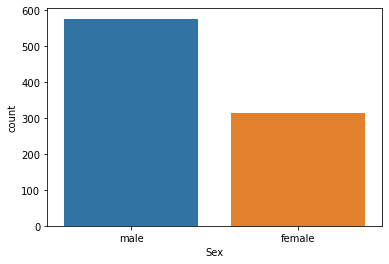

In [15]:
# We can see there are way more males than females on the Titanic
sns.countplot(x='Sex',data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

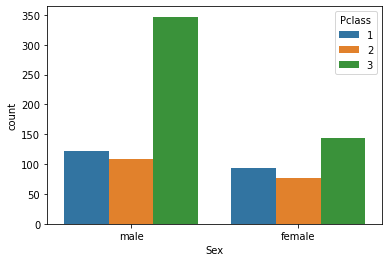

In [19]:
# Let's separate the genders by classes
# We see most of the males were in the 3rd class
sns.countplot(x='Sex',data=titanic_df,hue='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

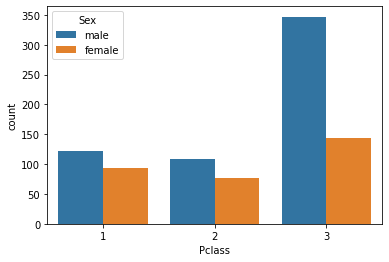

In [20]:
# We can tell the difference even more by plotting it this way
# Much more of the third class were male than female
# The first and second classes were more even
sns.countplot(x='Pclass',data=titanic_df,hue='Sex')

In [21]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [23]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [24]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


<AxesSubplot:xlabel='Pclass', ylabel='count'>

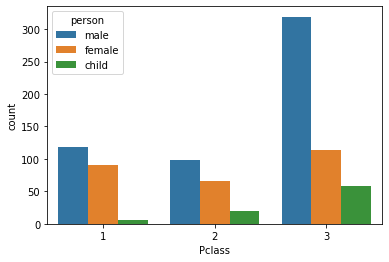

In [25]:
# Now using our new column, let's separate the classes by male, female, or child
# We see quite a bit more children in third class, and not so much in first or second
sns.countplot(x='Pclass',data=titanic_df,hue='person')

<AxesSubplot:>

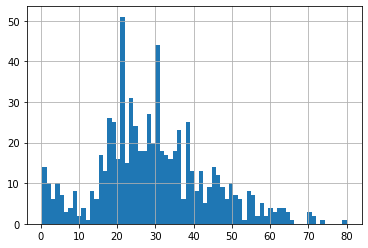

In [26]:
# Let's make a histogram to get a sense of the distribution of the
# ages of the passengers on the Titanic
# We see from this that the mean is somewhere around 30 years old
titanic_df['Age'].hist(bins=70)

In [28]:
# Now let's find the mean Age of passengers
titanic_df['Age'].mean()

29.69911764705882

In [30]:
# Get an overall comparison of Male, Female, and Child
# We see how many of each we have on board
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

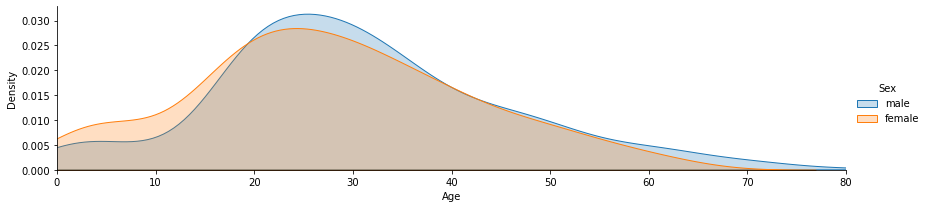

In [36]:
# Let's see distribution of males and females
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

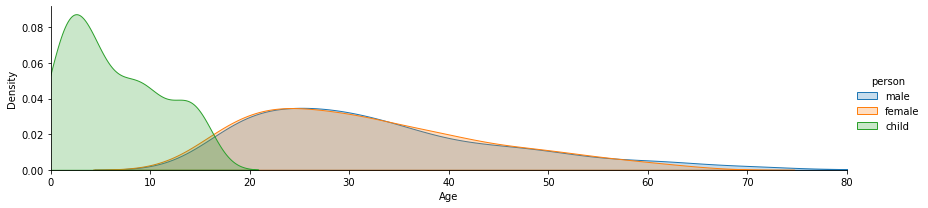

In [35]:
# Now let's see age distribution of males, females, and children
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

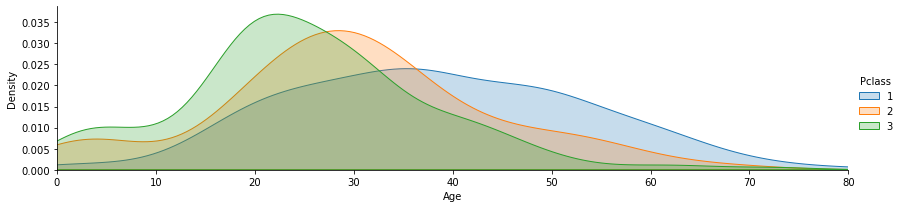

In [39]:
# Let's do this for Pclass as well to see how the ages range by class
# First class is more normal distribution
# Second and third class are not
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [40]:
# We see that the Cabin column has a lot of missing data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [43]:
# Remove entries that had a null deck
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

<AxesSubplot:xlabel='Cabin', ylabel='count'>

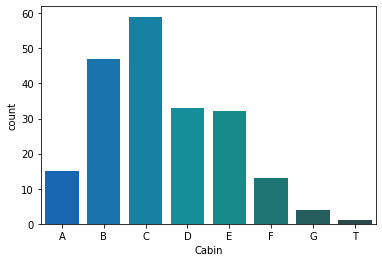

In [47]:
# We only need the first letter of the deck to classify it's level

levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot(x='Cabin',data=cabin_df,palette='winter_d',order=['A','B','C','D','E','F','G','T'])

<AxesSubplot:xlabel='Cabin', ylabel='count'>

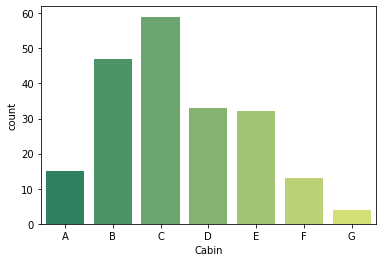

In [48]:
# Remove cabin T
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot(x='Cabin',data=cabin_df,palette='summer',order=['A','B','C','D','E','F','G'])

In [49]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


<AxesSubplot:xlabel='Embarked', ylabel='count'>

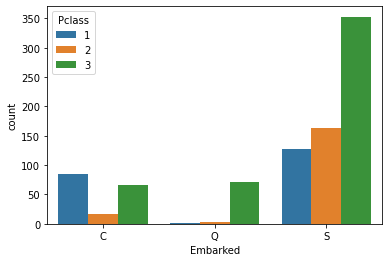

In [54]:
# Let's see where the passengers came from
# Let's see the cities that they embarked from, and who from which class came from those cities

# It looks like everyone from Queenstown was in third class
# Majority in C were in 1st class.
# And majority in S were third class.

sns.countplot(x='Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])

In [56]:
# Who was alone and who was with family?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [59]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']

In [60]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [61]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\wmela\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [62]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


<AxesSubplot:xlabel='Alone', ylabel='count'>

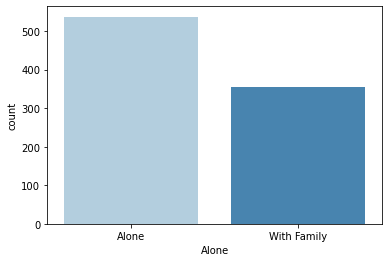

In [65]:
# From this plot, we can see that there were more people alone than with family
sns.countplot(x='Alone',data=titanic_df,palette='Blues',order=['Alone','With Family'])

<AxesSubplot:xlabel='Survivor', ylabel='count'>

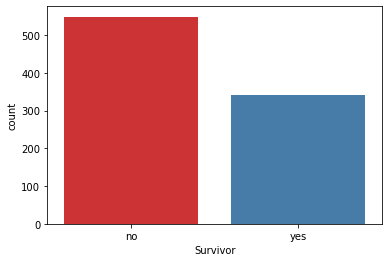

In [66]:
# We see more people did not survive the Titanic than those who did
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no',1: 'yes'})

sns.countplot(x='Survivor',data=titanic_df,palette='Set1')

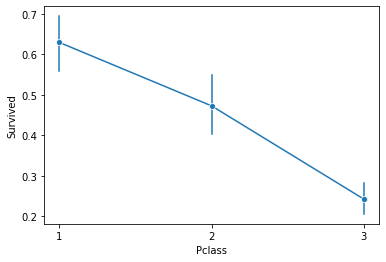

In [93]:
# Let's see if Pclass was a factor on surviving the Titanic
# We see the general survival rate for 3rd class is substantially lower


classes = titanic_df['Pclass'].unique()
classes = np.sort(classes)

g = sns.lineplot(data=titanic_df,x='Pclass',y='Survived', err_style="bars",marker='o')
g.set_xticks(classes)

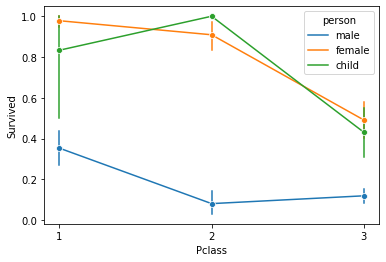

In [95]:
# Let's see how gender affects the survival rate for each class

# We can see that males tend to have a lower survivability rate in all 3 classes
# compared to females and children
# This makes the phrase "Women and children first" pretty accurate

classes = titanic_df['Pclass'].unique()
classes = np.sort(classes)

g = sns.lineplot(data=titanic_df,x='Pclass',y='Survived',hue='person', err_style="bars",marker='o')
g.set_xticks(classes)

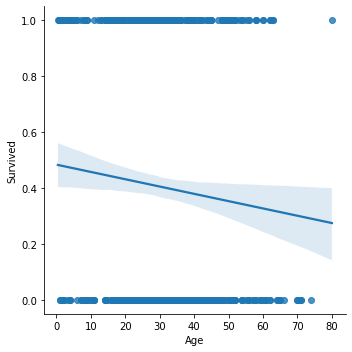

In [97]:
# Let's see if Age is a factor

# We see from this that the older the passenger was, the less likely they survived

sns.lmplot(x='Age',y='Survived',data=titanic_df)

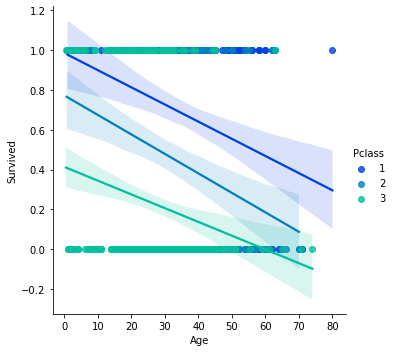

In [98]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter')

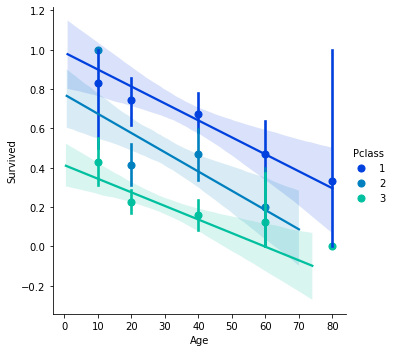

In [100]:
# Let's make some bins to clean up the graph

# We see a really high standard deviation on people in the older class (80)
generations = [10,20,40,60,80]

sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

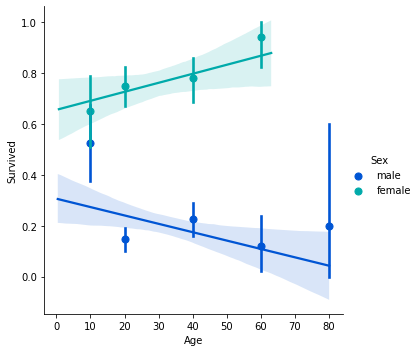

In [101]:
# Now let's look at the gender and age for survivability

# Looks like if you are an older female, you have a better chance of surviving vs an older male

sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)